<a href="https://colab.research.google.com/github/mariaclaraseixa/EVcharging/blob/main/EVcharging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise de Dados: Estações de Recarga de Veículos Elétricos


Este notebook replica a análise exploratória de dados (EDA) de um dataset global de estações de recarga de veículos elétricos (VE). O objetivo é responder à pergunta de negócio:  **"O que mais influencia na decisão sobre onde instalar uma estação de recarga?"**


# Meta-análise da Análise de Dados das Estações de Recarga de VE


Durante a fase de limpeza e preparação dos dados, foi realizada uma verificação de outliers para as colunas numéricas relevantes ( Cost (USD/kWh) , Distance to City (km), Usage Stats (avg users/day) ,
Charging Capacity (KW), Reviews (Rating) , Parking Spots ) utilizando o método do Intervalo Interquartil (IQR).
Não foram encontrados outliers significativos em nenhuma das colunas numéricas analisadas. Os valores que poderiam ser considerados outliers eram, na verdade, variações naturais e importantes para a compreensão completa do cenário das estações de recarga, e não erros de dados que pudessem distorcer a análise.

* Nenhum Prejuízo à Análise: A ausência de outliers sugere que os dados numéricos estão relativamente bem comportados e não contêm anomalias que distorceriam medidas como média, desvio padrão ou correlações de forma significativa. Isso aumenta a confiança nos resultados da análise descritiva e exploratória.

* Representatividade dos Dados: A manutenção de todos os pontos de dados (já que nenhum foi classificado como outlier) garante que a análise reflita a totalidade das informações presentes no dataset, sem a remoção arbitrária de observações que poderiam ser legítimas, mesmo que incomuns.

* Robustez dos Insights: Os insights gerados, como a correlação entre capacidade de carregamento e uso, ou a distribuição de tipos de carregadores, são robustos, pois não foram influenciados por valores extremos que poderiam puxar as estatísticas em uma direção específica. A ausência de outliers fortes valida a representatividade das tendências observadas.

Em suma, a não remoção de outliers não prejudicou a análise, pois a etapa de identificação revelou que não havia outliers a serem removidos nas variáveis numéricas analisadas pelo método IQR.



In [ ]:

!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para os gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Carrega o dataset a partir do caminho local especificado
df = pd.read_csv(r"/content/detailed_ev_charging_stations.csv")

print("### Primeiras 5 linhas do dataset:")
print(df.head())

print("\n\n### Informações do dataset:")
df.info()

# Convertendo Latitude e Longitude para numérico, tratando erros
df["Latitude"] = pd.to_numeric(df["Latitude"], errors="coerce")
df["Longitude"] = pd.to_numeric(df["Longitude"], errors="coerce")

# Removendo linhas com valores ausentes em Latitude/Longitude
initial_rows = len(df)
df.dropna(subset=["Latitude", "Longitude"], inplace=True)
rows_after_dropping_na = len(df)
print(f"\n\nLinhas removidas devido a valores ausentes em Latitude/Longitude: {initial_rows - rows_after_dropping_na}")

# Removendo duplicatas
duplicatas_antes = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"\n\nLinhas duplicadas removidas: {duplicatas_antes}")

print("\n\n### Informações do dataset após a limpeza:")
df.info()

### Primeiras 5 linhas do dataset:
  Station ID   Latitude   Longitude                                Address  \
0   EVS00001 -33.400998   77.974972       4826 Random Rd, City 98, Country   
1   EVS00002  37.861857 -122.490299  8970 San Francisco Ave, San Francisco   
2   EVS00003  13.776092  100.412776              5974 Bangkok Ave, Bangkok   
3   EVS00004  43.628250  -79.468935              6995 Toronto Ave, Toronto   
4   EVS00005  19.119865   72.913368                5704 Mumbai Ave, Mumbai   

      Charger Type  Cost (USD/kWh) Availability  Distance to City (km)  \
0       AC Level 2            0.27   9:00-18:00                   4.95   
1  DC Fast Charger            0.19         24/7                   4.96   
2       AC Level 2            0.48   6:00-22:00                   8.54   
3       AC Level 1            0.41   9:00-18:00                  13.28   
4       AC Level 2            0.11   9:00-18:00                   9.76   

   Usage Stats (avg users/day) Station Operator  Ch

/tmp/ipython-input-311750915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Charger Type", order=df["Charger Type"].value_counts().index, palette="viridis")


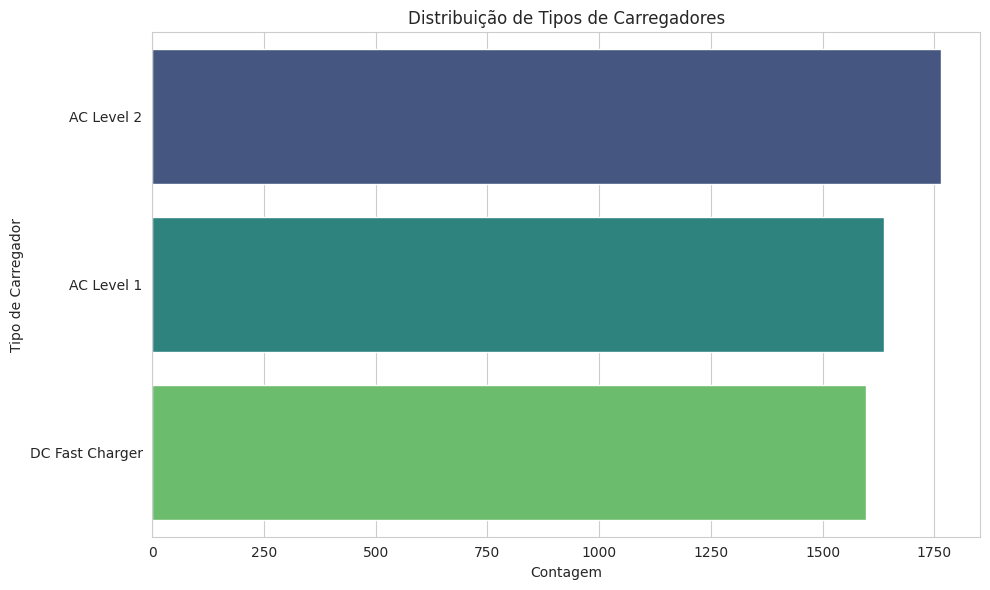

/tmp/ipython-input-311750915.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Station Operator", order=df["Station Operator"].value_counts().head(10).index, palette="magma")


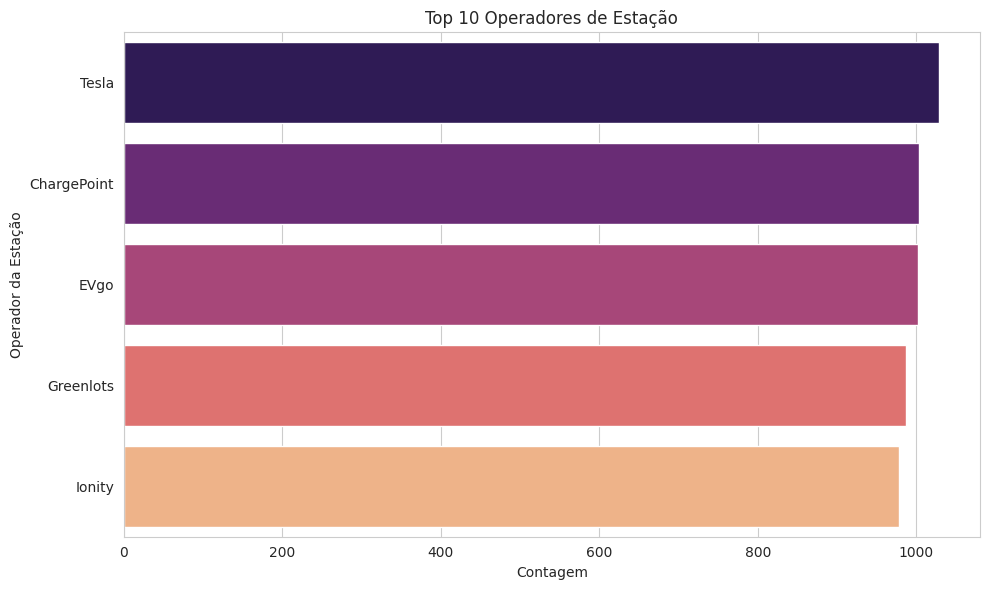

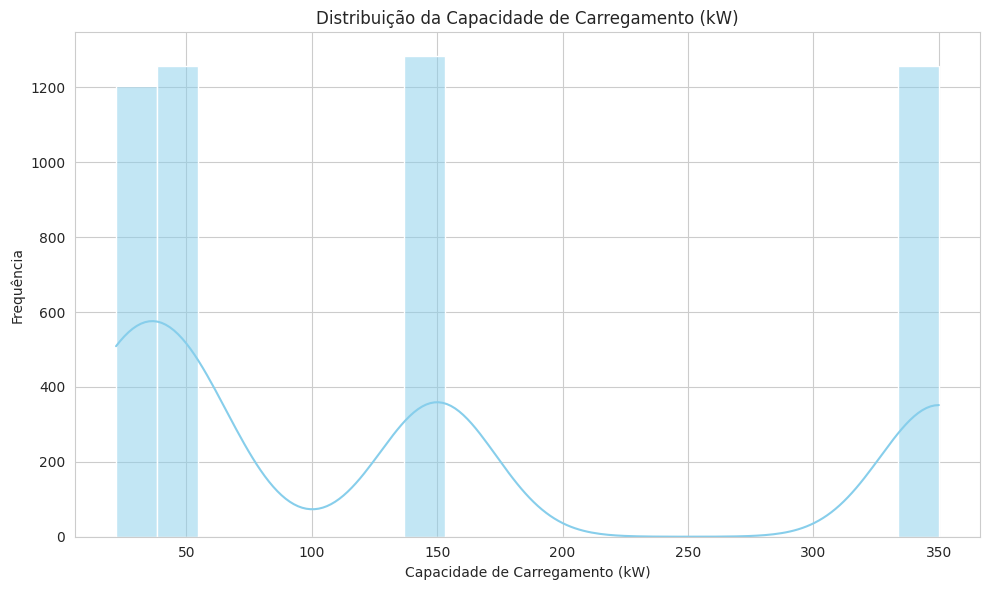

In [ ]:
# 1. Distribuição de Charger Type
plt.figure()
sns.countplot(data=df, y="Charger Type", order=df["Charger Type"].value_counts().index, palette="viridis")
plt.title("Distribuição de Tipos de Carregadores")
plt.xlabel("Contagem")
plt.ylabel("Tipo de Carregador")
plt.tight_layout()
plt.show()

# 2. Distribuição de Station Operator (Top 10)
plt.figure()
sns.countplot(data=df, y="Station Operator", order=df["Station Operator"].value_counts().head(10).index, palette="magma")
plt.title("Top 10 Operadores de Estação")
plt.xlabel("Contagem")
plt.ylabel("Operador da Estação")
plt.tight_layout()
plt.show()

# 3. Distribuição de Charging Capacity (kW)
plt.figure()
sns.histplot(df["Charging Capacity (kW)"], bins=20, kde=True, color="skyblue")
plt.title("Distribuição da Capacidade de Carregamento (kW)")
plt.xlabel("Capacidade de Carregamento (kW)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

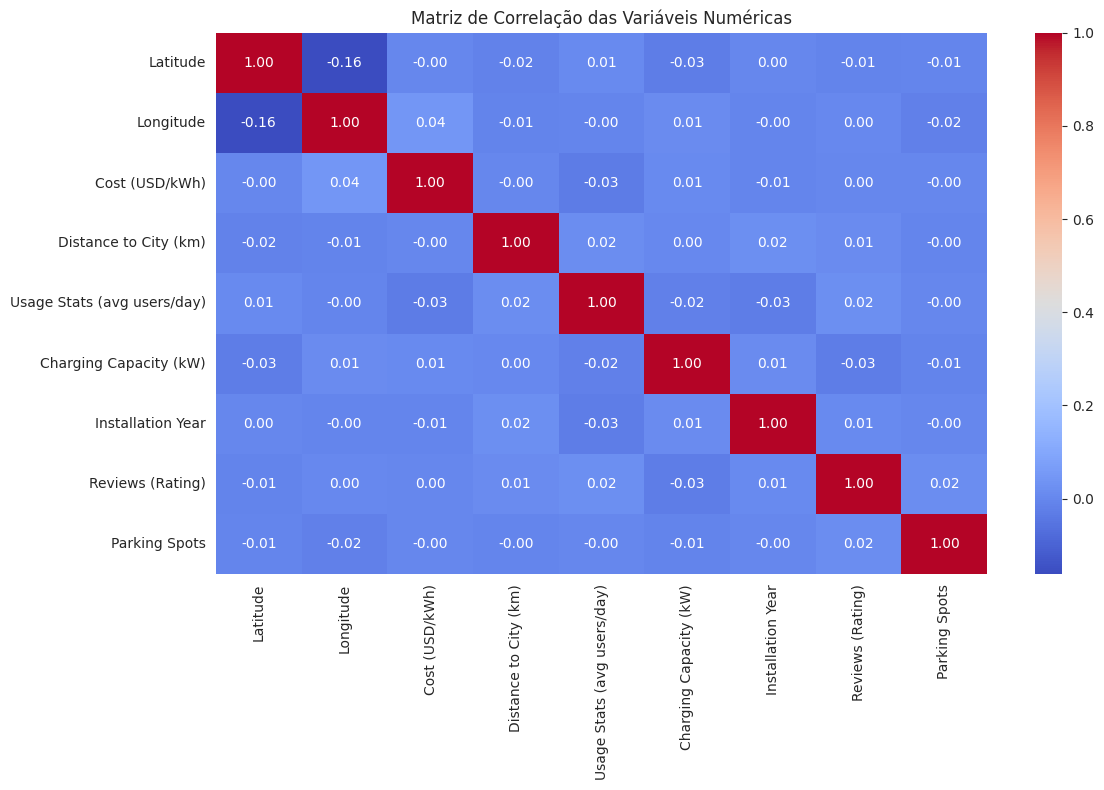

/tmp/ipython-input-3122070248.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Charger Type", y="Charging Capacity (kW)", palette="pastel")


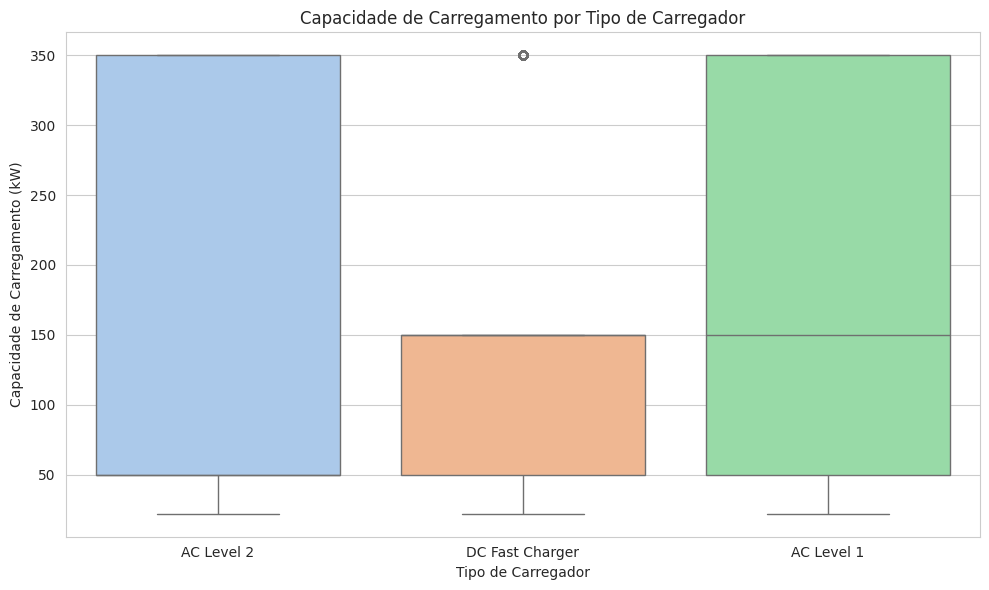

/tmp/ipython-input-3122070248.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_operators, x="Station Operator", y="Usage Stats (avg users/day)", palette="coolwarm", errorbar=None)


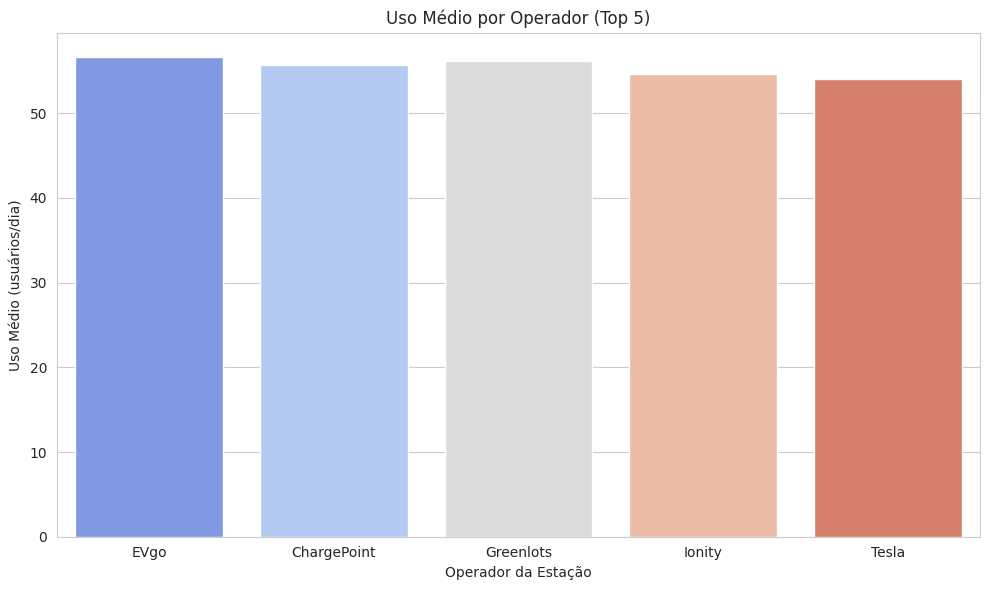

In [ ]:

# 1. Matriz de Correlação e Heatmap
numeric_df = df.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.tight_layout()
plt.show()

# 2. Capacidade de Carregamento por Tipo de Carregador (Boxplot)
plt.figure()
sns.boxplot(data=df, x="Charger Type", y="Charging Capacity (kW)", palette="pastel")
plt.title("Capacidade de Carregamento por Tipo de Carregador")
plt.xlabel("Tipo de Carregador")
plt.ylabel("Capacidade de Carregamento (kW)")
plt.tight_layout()
plt.show()

# 3. Uso Médio por Operador (Top 5)
plt.figure()
top_operators = df["Station Operator"].value_counts().head(5).index
df_top_operators = df[df["Station Operator"].isin(top_operators)]
sns.barplot(data=df_top_operators, x="Station Operator", y="Usage Stats (avg users/day)", palette="coolwarm", errorbar=None)
plt.title("Uso Médio por Operador (Top 5)")
plt.xlabel("Operador da Estação")
plt.ylabel("Uso Médio (usuários/dia)")
plt.tight_layout()
plt.show()



## Conclusão

Com base na análise, os principais fatores que influenciam a decisão sobre onde instalar uma estação de recarga são:

- **Capacidade de Carregamento e Tipo de Carregador:** Estações de alta capacidade (DC Fast Chargers) atraem mais usuários.
- **Proximidade a Centros Urbanos:** Estações mais próximas de cidades tendem a ter maior uso.
- **Reputação do Operador:** Operadores estabelecidos como EVgo e ChargePoint têm maior uso médio.
- **Conveniência:** Fatores como número de vagas e boas avaliações contribuem para a atratividade da estação.

O relatório deve ser organizado por perguntas de investigação, e não por tipo de gráfico. Isso ajudará a entender mais sobre os principais fatores que influenciam a decisão de onde instalar as estacoes de recargas.
- qual o perfil dos carregadores de carro eletrico?
- quais fatores influenciam o uso diario?
- o que mais impacta no uso diario e como é significativo para tal; ex: o tipo de carregador afeta o uso diario?

Essa abordagem conta uma história melhor, já que cada gráfico serve para responder uma pergunta específica.



Se um gráfico não tem relevancia, não ajuda, é confuso e não agrega, não compensa colocar. Foi o caso do scatterplot.

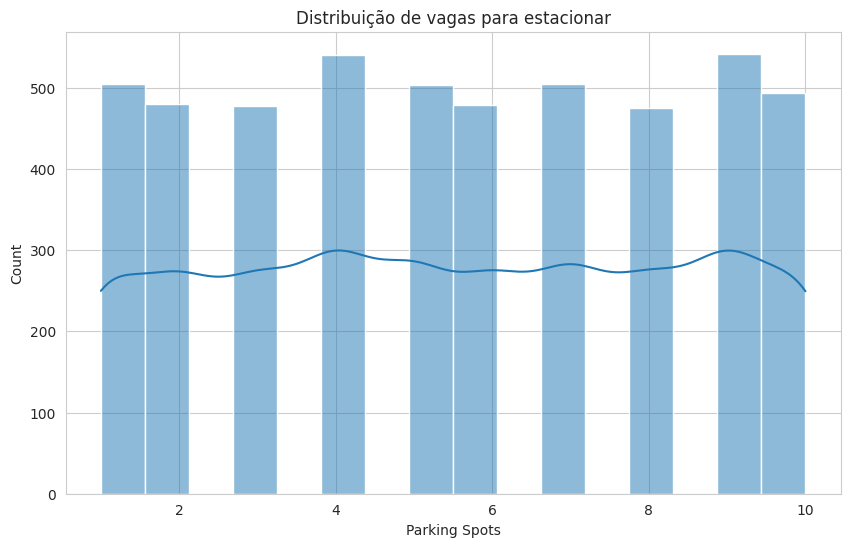

/tmp/ipython-input-309031943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Connector Types'], palette='viridis')


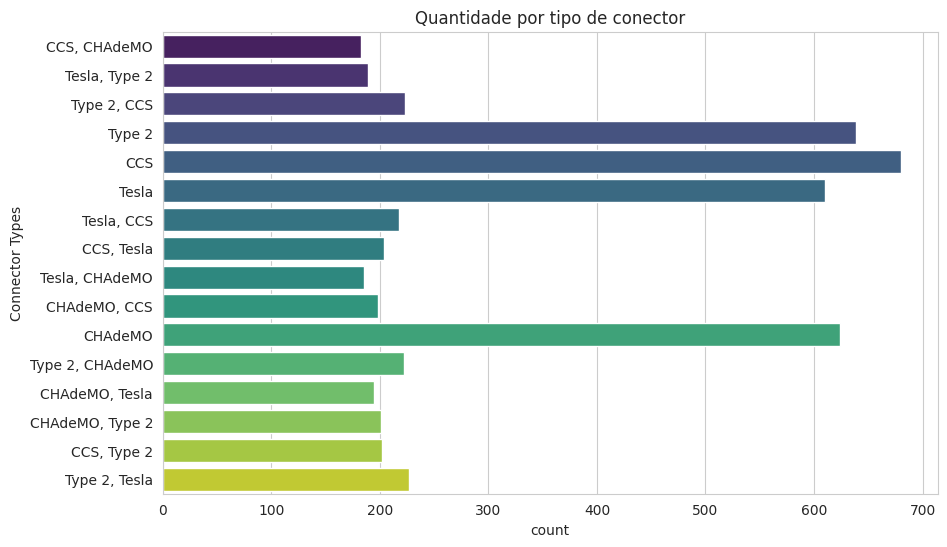

/tmp/ipython-input-309031943.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_users = df.groupby('Capacity Range')['Usage Stats (avg users/day)'].mean().reset_index()
/tmp/ipython-input-309031943.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Capacity Range', y='Usage Stats (avg users/day)', data=avg_users, palette='viridis')


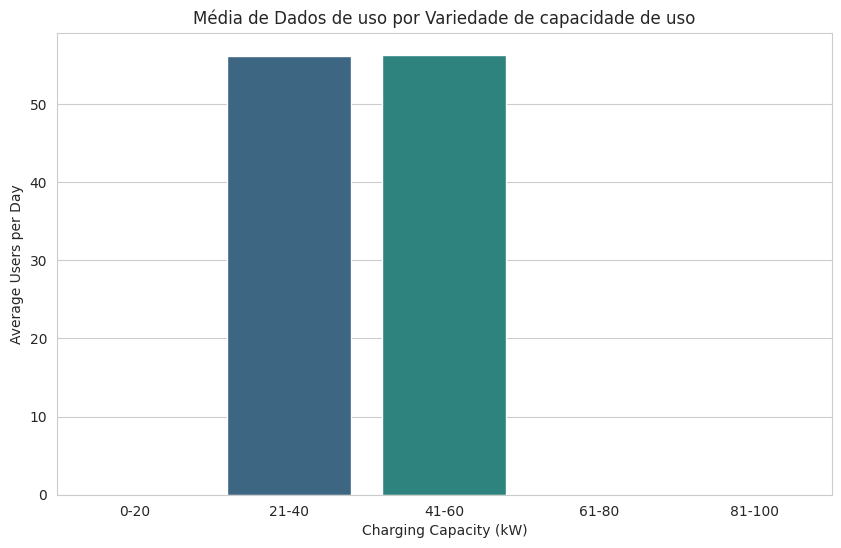

In [ ]:
# 1. Analise Univariada - Distribuição de lugares para estacionar
sns.histplot(df['Parking Spots'], kde=True)
plt.title('Distribuição de vagas para estacionar')
plt.show()

# 2. Analise Bivariada - Distribuição de Station Operator (Top 10)
sns.countplot(y=df['Connector Types'], palette='viridis')
plt.title('Quantidade por tipo de conector')
plt.show()

# 3. Analise Multivariada - Distribuição de Charging Capacity (kW)
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Capacity Range'] = pd.cut(df['Charging Capacity (kW)'], bins=bins, labels=labels)

avg_users = df.groupby('Capacity Range')['Usage Stats (avg users/day)'].mean().reset_index()

sns.barplot(x='Capacity Range', y='Usage Stats (avg users/day)', data=avg_users, palette='viridis')
plt.title('Média de Dados de uso por Variedade de capacidade de uso')
plt.xlabel('Charging Capacity (kW)')
plt.ylabel('Average Users per Day')
plt.show()

O que aprendi com esses gráficos é que a distribuição de vagas para estacionamento é bastante similar entre as estações, sendo que a maioria delas conta com um número elevado de vagas. Por isso, acredito que esse fator não tenha grande influência na escolha da estação de carregamento.

Em relação aos tipos de conectores, os mais presentes são o CCS (com quase 700 registros), seguido pelos tipos 2 e CHAdeMO. Acredito que essa predominância esteja diretamente relacionada à compatibilidade com os veículos elétricos mais comuns. Após esses três, os demais tipos apresentam uma média de cerca de 200 registros cada.

Quanto à capacidade de carregamento, os valores mais frequentes estão nas faixas de 21–40 kW e 41–60 kW, com uma distribuição equilibrada entre elas. Outras faixas de potência são pouco representativas ou praticamente inexistentes.

A única correlação forte entre as variáveis numéricas foi entre o número de vagas de estacionamento e a latitude. As demais variáveis não apresentam uma relação significativa entre si.